In [1]:
"""
FEniCS tutorial demo program: Incompressible Navier-Stokes equations
for flow around a cylinder using the Incremental Pressure Correction
Scheme (IPCS).

  u' + u . nabla(u)) - div(sigma(u, p)) = f
                                 div(u) = 0
"""

from __future__ import print_function
from fenics import *
from mshr import *
import numpy as np

%matplotlib inline

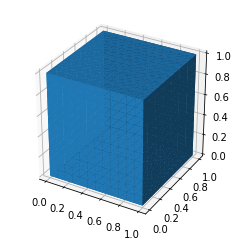

In [2]:
# Create mesh

nx = 12
ny = 12
nz = 12

mesh = UnitCubeMesh(nx,ny,nz) # 10 is number of intervals Omega is divided into
plot(mesh);

In [6]:
xdmffile_p = XDMFFile(mesh.mpi_comm(), 'pressure4.xdmf')

xml_mesh = File('mesh.xml')
xml_mesh << mesh

In [4]:
# Define function spaces. Define trial and test functions

V = FunctionSpace(mesh,"Lagrange",2)
q = TestFunction(V)
p = TrialFunction(V)

p_ = Function(V)


# Define boundaries
inflow   = 'near(x[0], 0)'
outflow  = 'near(x[2], 1)'

# Define inflow profile
inflow_profile = ('2*pi*sin(2*pi*x[1])')

bcp_inflow = DirichletBC(V, Expression(inflow_profile, degree=2), inflow)

bcp_outflow = DirichletBC(V, Constant(0), outflow)

bcp = [bcp_inflow,bcp_outflow]

K = Constant(0.5)

f = Constant(0)
s = Constant(0)

#a = -K * inner(grad(p),grad(q))*dx
#L = f*q*dx + s*q*dx

p = Function(V)
F = -K * dot(grad(p), grad(q))*dx + f*dx + s*dx

# Assemble matrices
#A = assemble(a)

#[bc.apply(A) for bc in bcp]

#b = assemble(L)


This integral is missing an integration domain.


UFLException: This integral is missing an integration domain.

In [5]:
#solve(A, p_.vector(), b, 'mumps')
solve(F==0, p, bcp)

W = VectorFunctionSpace(mesh, "P", 2)
w = project(-K*grad(p_), W)

#xdmffile_p.write_checkpoint(p, 'p')


#xdmffile_p.close()

NameError: name 'F' is not defined